To fill the FCC lattice 0 particles were added for a total of 70 particles.
0.6868840872281853
0.6967650591832241


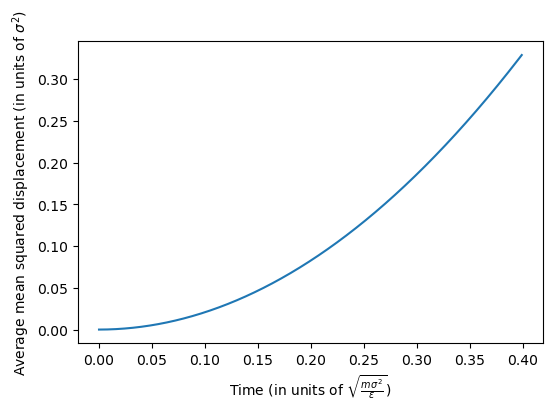

In [1]:
import skeleton_ours
from skeleton_ours import simulate
from skeleton_ours import fcc_lattice
from skeleton_ours import init_velocity
import itertools
import numpy as np
from numpy import random
import matplotlib.pyplot as plt 
import matplotlib.animation
import time
import mpl_toolkits.mplot3d.axes3d as p3



dim = 3
num_tsteps = 1000
num_atoms = 70
box_dim = 100000
temp=100
timestep = 0.0004


x, num_atoms = fcc_lattice(num_atoms, box_dim, dim, 0)
init_vel, sigma = init_velocity(num_atoms, temp, dim)
init_pos = x

x, v, T, U, r = simulate(init_pos, init_vel, num_tsteps, timestep, box_dim, num_atoms, dim, temp)



def mean_squared_displacement(x, box_dim):
    
    '''
    Calculates the mean squared displacement on each atom and the average. The first timestep is the reference position for the calculation.

    Parameters
    ----------
    x : np.ndarray
        Positions of all particles for all timesteps
    box_dim : np.ndarray
        Linear size of the domain
        
    Returns
    -------
    MSD : np.ndarray
        MSD(t) for all individual particles
    ASMD: np.ndarray
        Averaged MSD(t) over all particles
    '''
    D=x[1:len(x)]-x[0] #Calculate difference compared to its initial position
    D = np.where(D > 0.9*box_dim , D - box_dim, D) #makes sure that periodic boundary conditions dont let the MSD jump
    D = np.where(D < -0.9*box_dim , D + box_dim, D)
    MSD = np.sum(np.power(D,2), axis=2)
    AMSD = np.sum(MSD,1)/x.shape[1]
    return MSD, AMSD


MSD,AMSD=mean_squared_displacement(x,box_dim)

#print(AMSD)
plt.figure(3)
t = timestep * np.arange(0,num_tsteps-1)
p=np.polyfit(t,AMSD,2)
print(p[0]/3)
print(sigma**2)
#plt.plot(t, p[0]*(t**2)+p[1]*t+p[2], label = 'MSD fit')
plt.plot(t, AMSD, label = 'AMSD')

plt.xlabel(r'Time (in units of $\sqrt{\frac{m\sigma^2}{\epsilon}}$)')
plt.ylabel(r'Average mean squared displacement (in units of $\sigma^2$)')
plt.savefig('Parabollic behaviour of the MSD.png')
#plt.legend()
#print(MSD[:,0])
#print(p[0]*(t**2)+p[1]*t+p[2])




In [ ]:
import skeleton_ours
from skeleton_ours import simulate, fcc_lattice, init_velocity
#from skeleton_ours import 
#from skeleton_ours import 
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation
import time

dim = 3
num_tsteps = 5000
num_atoms = 10
box_dim = 100
timestep = 0.0004
temp = 1000
fill=0

np.random.seed(1)
#init_vel = np.array([[0,0],[0,1],[1,0],[0.5,0.5]])
#init_pos = np.array([[5,5],[5 - 2**(1/6),5],[5,6],[4,4]])
x, num_atoms = fcc_lattice(num_atoms, box_dim, dim, fill)
init_vel, sigma = init_velocity(num_atoms, temp, dim)
init_pos = x
x, v, T, U, r = simulate(init_pos, init_vel, num_tsteps, timestep, box_dim, num_atoms, dim, temp)


def autocorrelation(x, num_atoms,box_dim,timestep):
    
    '''
    Calculates the mean squared displacement on each atom and the average. The first timestep is the reference position for the calculation.

    Parameters
    ----------
    x : np.ndarray
        Positions of all particles for all timesteps
    box_dim : np.ndarray
        Linear size of the domain
        
    Returns
    -------
    MSD : np.ndarray
        MSD(t) for all individual particles
    ASMD: np.ndarray
        Averaged MSD(t) over all particles
    '''
  
    NT = num_atoms-(np.arange(len(x)-1)+1)*timestep
    t1 = NT*np.sum(x[0:len(x)-1,0:num_atoms,0]*x[1:len(x),0:num_atoms,0],axis=1)
    t2 = np.sum(x[0:len(x)-1,0:num_atoms,0],axis=1)*np.sum(x[1:len(x),0:num_atoms,0],axis=1)
    t3 = np.power(NT*np.sum(x[0:len(x)-1,0:num_atoms,0]**2,axis=1)-np.sum(x[0:len(x)-1,0:num_atoms,0],axis=1)**2,1/2)
    t4 = np.power(NT*np.sum(x[1:len(x),0:num_atoms,0]**2,axis=1)-np.sum(x[1:len(x),0:num_atoms,0],axis=1)**2,1/2)
    Xi = (t1-t2)/(t3*t4)
    return Xi

Xi = autocorrelation(x, num_atoms,box_dim,timestep)

plt.figure(2)

t = timestep * np.arange(100,num_tsteps-1)
plt.plot(t, Xi[100:len(Xi)], label = 'Autocorrelation')

plt.xlabel(r'Time (in units of $\sqrt{\frac{m\sigma^2}{\epsilon}}$)')
plt.ylabel(r'Energy (in units of $\epsilon$)')
plt.legend()